# ***Examen práctico parical 1 (Tipo 1)***
### Luis Eduardo Jiménez del Muro - 21/02/2025
---

## Paqueterías y funciones 

In [1]:
# Paqueterías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Funciones

# Gráfica de calibracion
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones':predicciones,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False) + 1
    grouped = df_calibracion.groupby('bins').mean()
    r2 = r2_score(y_pred=predicciones, y_true=y)
    
    # Gráfica
    plt.figure(figsize=(7,5))
    plt.plot(grouped['predicciones'], grouped['predicciones'], label='Real', color='red', lw=2)
    plt.plot(grouped['predicciones'], grouped['y'], label='Modelo', marker='o', color='cadetblue', ms=4, lw=2)
    plt.title(f'Calibración del modelo \n\n$R2={r2:.4f}$', fontweight='bold')
    plt.grid(alpha=0.3)
    plt.legend()


# Regresión Lineal
def lineal(X, y, type, q):
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    model = type.fit(X_train, y_train)
    predicciones_lineal = model.predict(X_test)
    calibracion(predicciones_lineal, y_test, q)


# Regresión Polinómica grado n
def polynomial(X, y, type, n, q):
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)

    poly_features = PolynomialFeatures(degree=n)
    X_poly = poly_features.fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

    model = type.fit(X_train, y_train)
    predicciones_poly_2 = model.predict(X_test)
    calibracion(predicciones_poly_2, y_test, q)

# **Información del Dataset**

+ CRIM - per capita crime rate by town

+ ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

+ INDUS - proportion of non-retail business acres per town.

+ CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

+ NOX - nitric oxides concentration (parts per 10 million)

+ RM - average number of rooms per dwelling

+ AGE - proportion of owner-occupied units built prior to 1940

+ DIS - weighted distances to five Boston employment centres

+ RAD - index of accessibility to radial highways

+ TAX - full-value property-tax rate per $10,000

+ PTRATIO - pupil-teacher ratio by town

+ B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

+ LSTAT - % lower status of the population

+ MEDV - Median value of owner-occupied homes in $1000's

# **Análisis Exploratorio**

## *Limpieza de datos*

In [3]:
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [6]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
lstat      455
medv       229
dtype: int64

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Crear variables dummy

+ A pesar de que los datos que hay en `rad` son numéricos, en realiadad representan categorías sobre la accesibilidad a las carreteras radiales.

+ En cuanto a `chas` no será necesario obtener dummies dado que ya es está en el formato de dummy.

In [8]:
categorical = ['chas', 'rad'] # No se elige chas porque ya está en formato de dummy
numerical = df.drop(columns=categorical).columns.tolist()
dummies = ['rad_1', 'rad_2', 'rad_3', 'rad_4', 'rad_5', 'rad_6', 'rad_7', 'rad_8', 'rad_24']

df = pd.get_dummies(df, columns=['rad'])
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,medv,rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,...,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,...,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,...,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,...,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,...,36.2,False,False,True,False,False,False,False,False,False


## *Visualización de los datos*

### Scatterplots contra el target

In [9]:
target = 'medv'

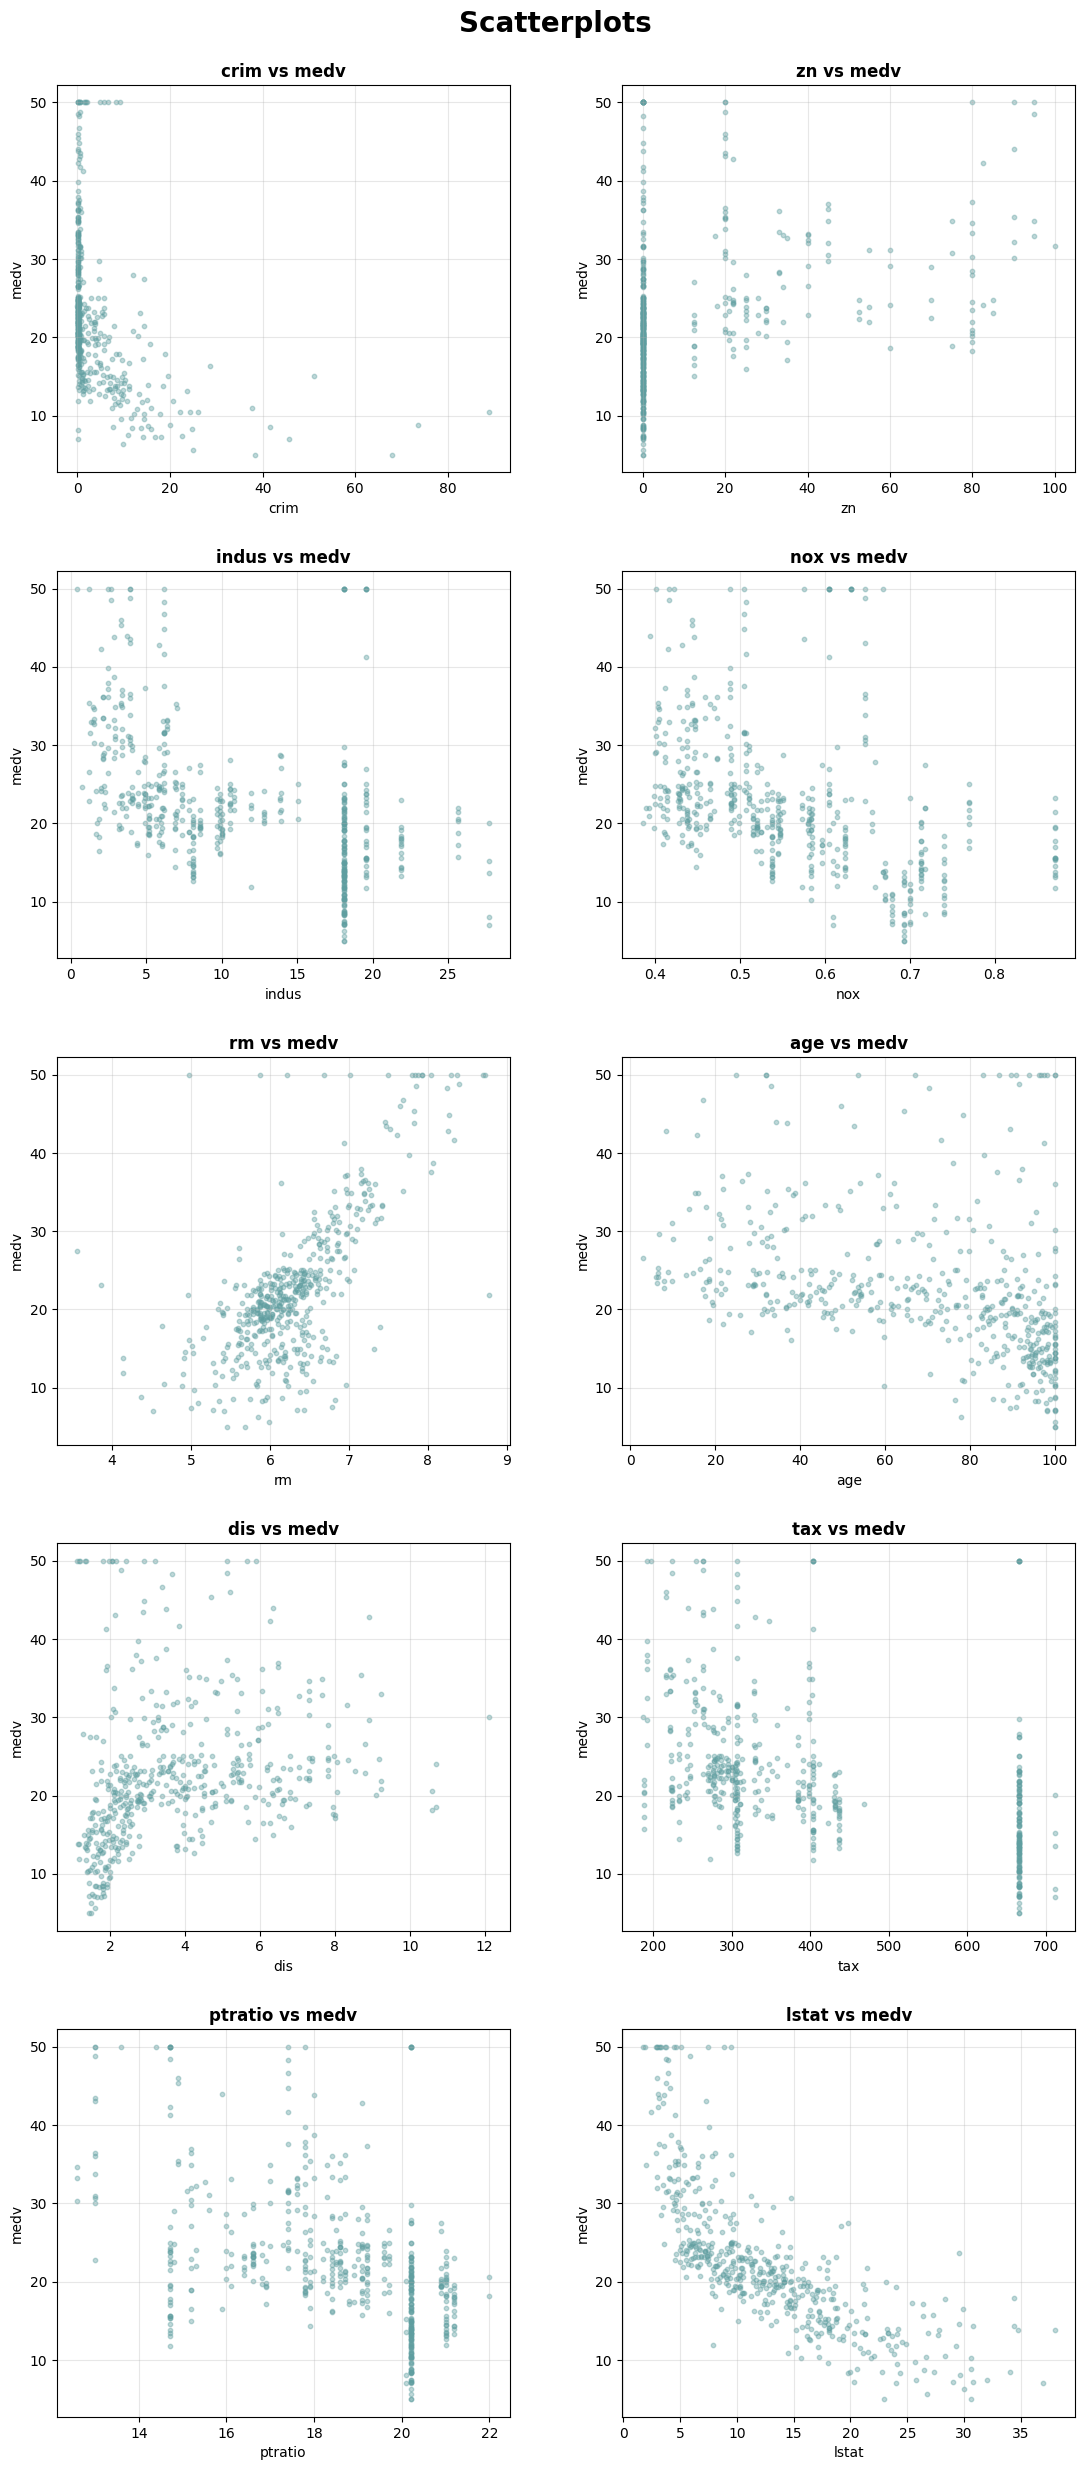

In [10]:
num_vars = len(numerical) 

fig, axes = plt.subplots(5, 2, figsize=(12, 25))
fig.tight_layout(pad=5)
fig.suptitle('Scatterplots', fontsize=20, fontweight='bold', y=1)

for i, ax in enumerate(axes.flat):
    if i < num_vars:
        ax.scatter(df[numerical[i]], df[target], marker='o', color='cadetblue', s=10, alpha=0.4)
        ax.set_title(f'{numerical[i]} vs {target}', fontsize=12, fontweight='bold')
        ax.set_xlabel(numerical[i])
        ax.set_ylabel(target)
        ax.grid(alpha=0.3)
    else:
        ax.remove() # Eliminar subplots vacíos

plt.show()

#### Observaciones

+ Variables como `lstat` y `rm` son las únicas a las que a simple vista podría parecer que se les puede ajustar una recta o polinomio.

+ `crim` y `zn` tienen una alta concentración de datos en cero.

+ Hay un salto muy grande en `tax` entre $450$ y $650$.

+ Las demás variables presentan mucha dispersión, por lo que, será mejor realizar un análisis bivariado para poder comprender mejor las relaciones con la variable objetivo.

### Análisis bivariado

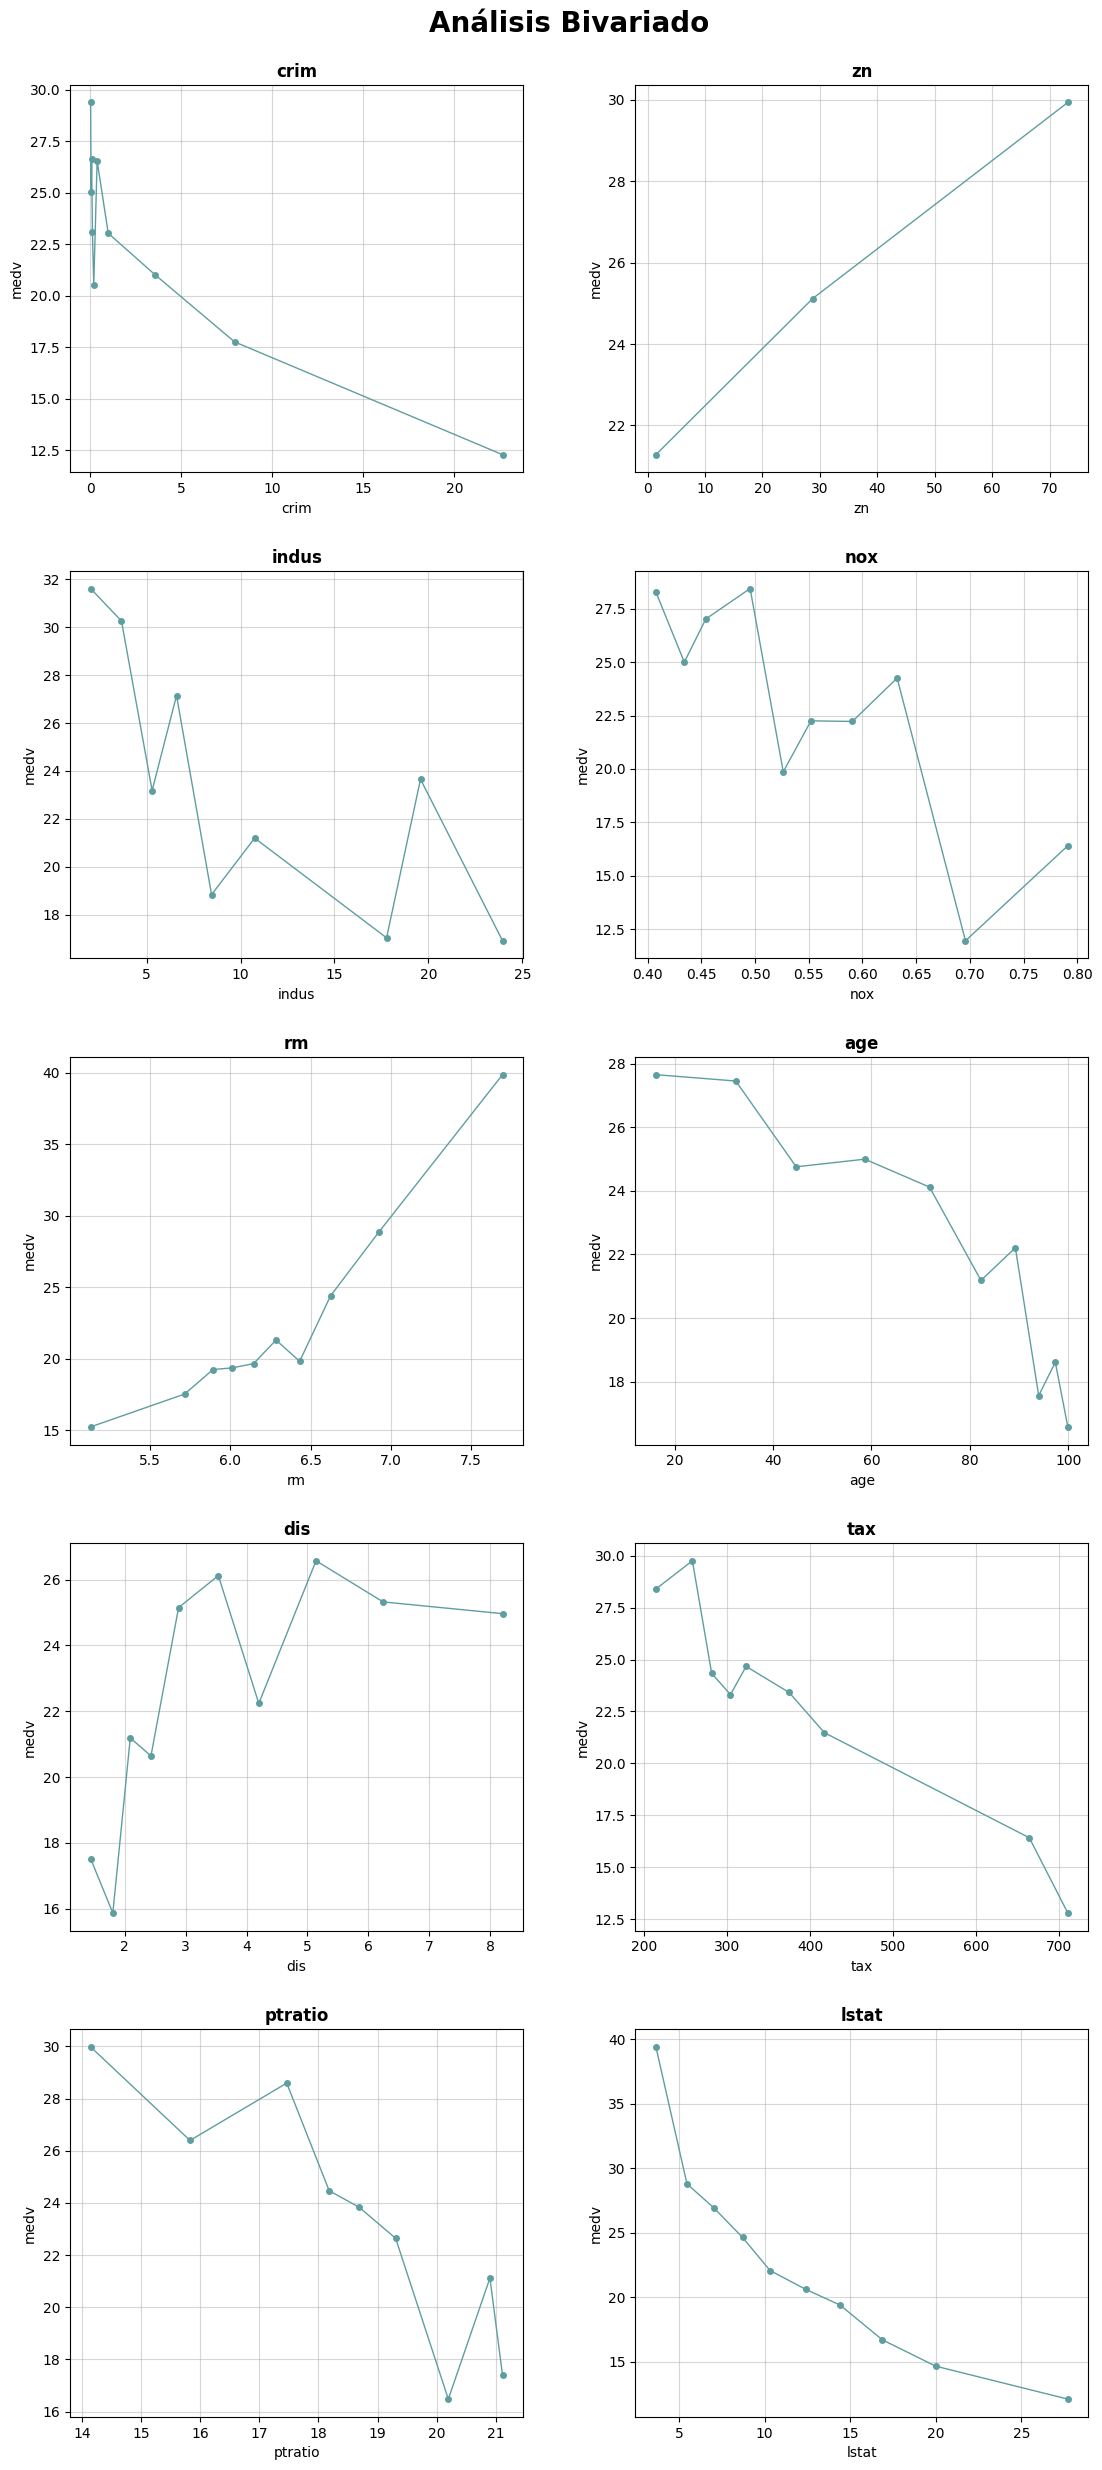

In [11]:
df_bivariado = df.copy()

fig, axes = plt.subplots(5, 2, figsize=(12, 25))
fig.tight_layout(pad=5)
fig.suptitle('Análisis Bivariado', fontsize=20, fontweight='bold', y=1)

for i, ax in enumerate(axes.flat):
    if i < num_vars:
        df_bivariado[f'{numerical[i]}_bins'] = pd.qcut(df_bivariado[numerical[i]], q=10, labels=False, duplicates='drop') + 1
        grouped_data = df_bivariado.groupby(f'{numerical[i]}_bins').mean()
            
        ax.plot(grouped_data[numerical[i]], grouped_data[target], marker='o', color='cadetblue', lw=1, markersize=4)
        ax.set_title(numerical[i], fontsize=12, fontweight='bold')
        ax.set_xlabel(numerical[i])
        ax.set_ylabel(target)
        ax.grid(alpha=0.5)
    else:
        ax.remove() # Eliminar subplots vacíos

plt.show()

#### Observaciones 

+ Solo hay una variable que se relaciona linealmente con el target de forma muy clara y es `zn`.

+ Variables como `rm` y `tax` tambien, podrían relacionarse linealmente. Sin embargo, podrian intentarse ajustar potencias diferentes.

+ `nox` y `ptratio` son variables con mucha dispersión, por ende, tambien habrá que probar si se ajustan mejor polinomios o rectas.

+ A pesar de que `indus` y `dis` tienen mucha dispersión, pueden relacionarse de forma cuadrática o algun otro grado de polinomio.

+ Con `crim`, `age` y `lstat` se observan relaciones cuadráticas claras.

### Histogramas

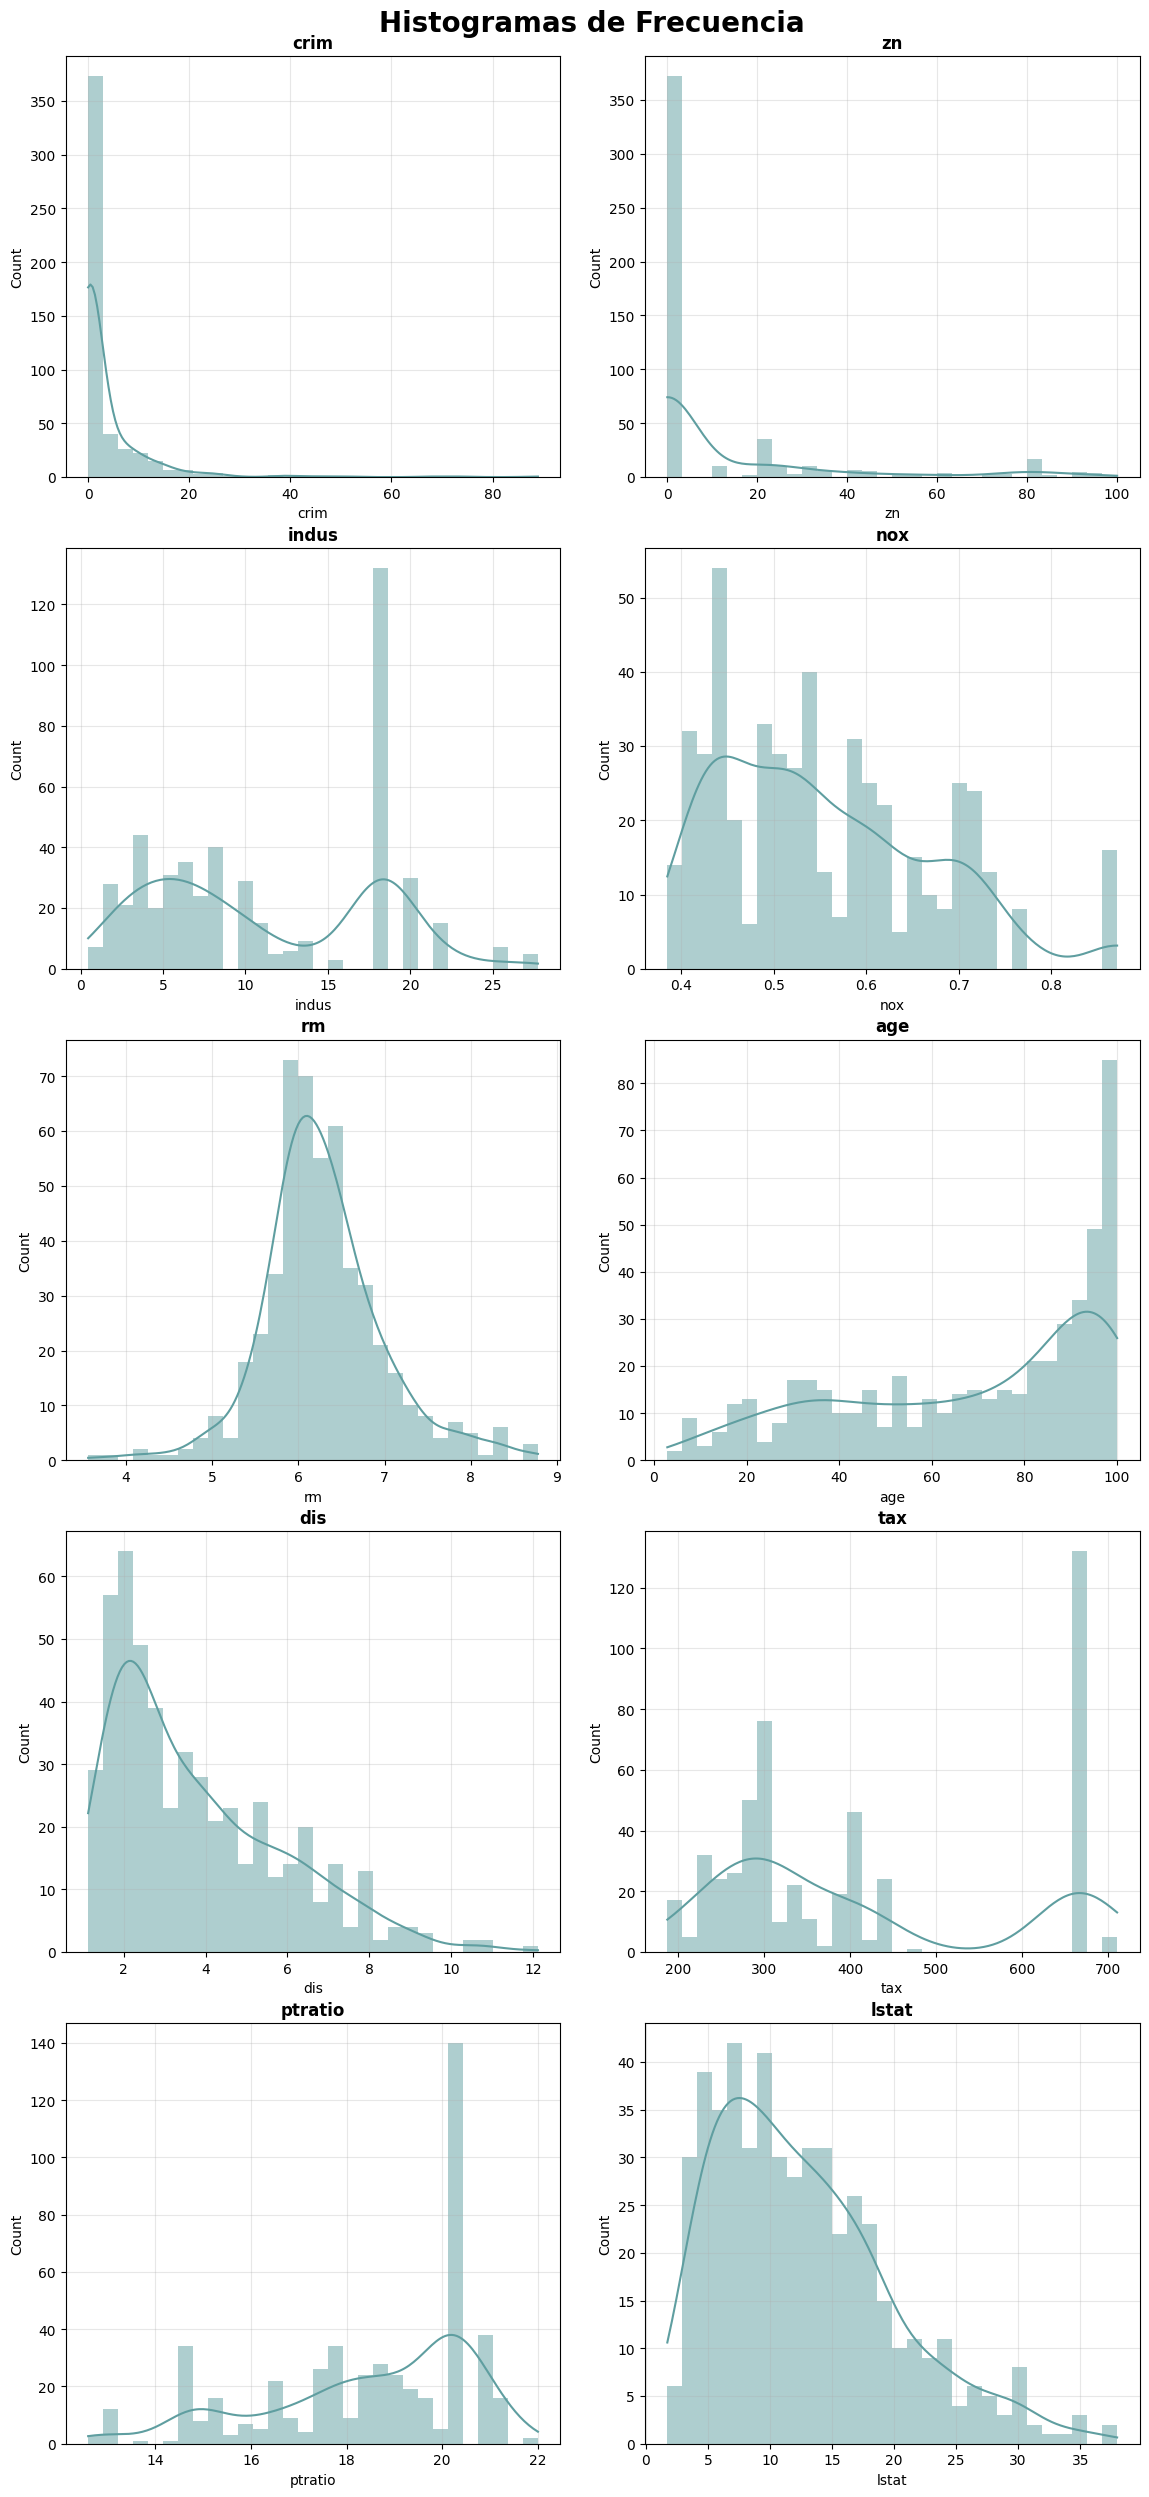

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(12,25))
fig.tight_layout(pad=3)
fig.suptitle('Histogramas de Frecuencia', fontsize=20, fontweight='bold', y=1)


for i, ax in enumerate(axes.flat):
    if i < num_vars:
        sns.histplot(df[numerical[i]],  color="cadetblue", kde=True, ax=ax, bins=30,  edgecolor=None)
        ax.set_title(numerical[i], fontsize=12, fontweight='bold')
        ax.grid(alpha=0.3)
    else:
        ax.remove() # Eliminar subplots vacíos


plt.show()

#### Observaciones

+ Podemos confirmar la alta cantidad de datos que existen en cero en las variables de `crim` y `zn`.

+ Los datos se distribuyen de formas muy diferentes entre sí, por lo que, sería conveniente probar haciendo estandarizaciones.

### Boxplots

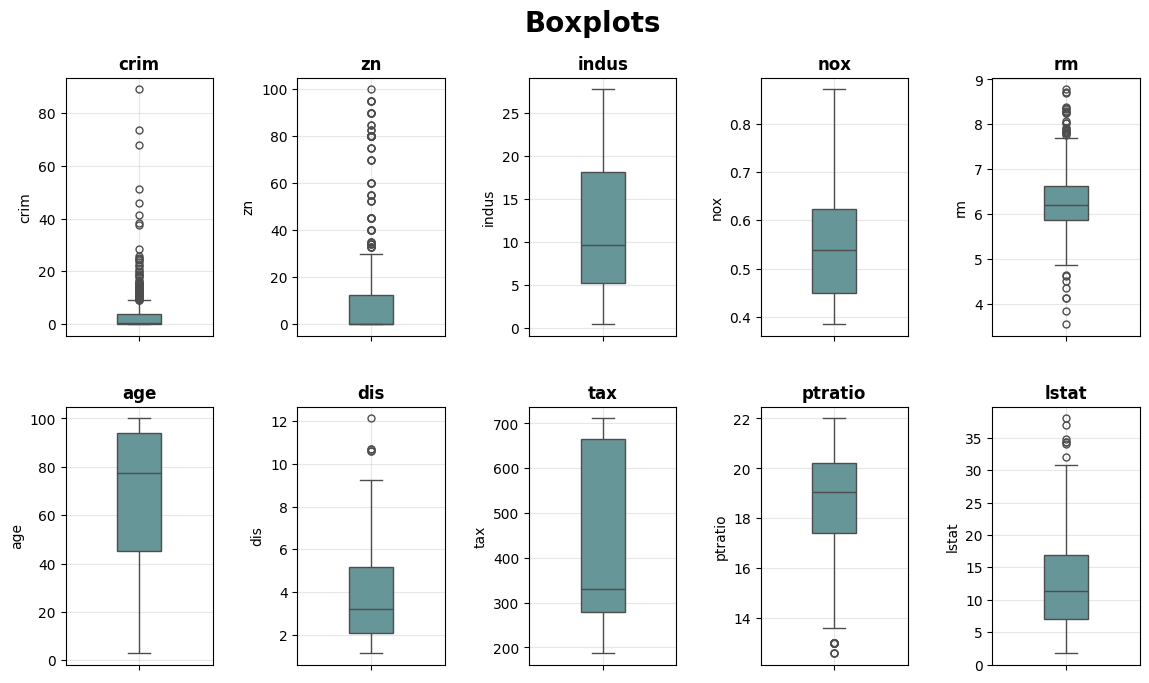

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(12,7))
fig.tight_layout(pad=3)
fig.suptitle('Boxplots', fontsize=20, fontweight='bold', y=1.03)

for i, ax in enumerate(axes.flat):
    if i < num_vars:
        sns.boxplot(y=df[numerical[i]], ax=ax, color="cadetblue", width=0.3, flierprops={'marker': 'o', 'markersize': 5})
        ax.set_title(numerical[i], fontsize=12, fontweight='bold')
        ax.grid(alpha=0.3)
    else:
        ax.remove() # Eliminar subplots vacíos

plt.show()

#### Observaciones

+ Dada la alta concentración de datos en cero de `crim` y `zn`, observamos que tambien hay muchos outliers, que podrían llegar a darle información importante al modelo, o incluso perjudicarlo.

+ `rm`, `dis`, `lstat` y `ptratio` tambien presentan outliers.

+ Al momento de hacer modelos, harán prubeas controlando y no controlando los outliers para ver como modifican el desempeño del modelo. Por ejemplo, tratar de controlar los datos atípicos con logarítmos.

## *Matriz de Correlaciones*

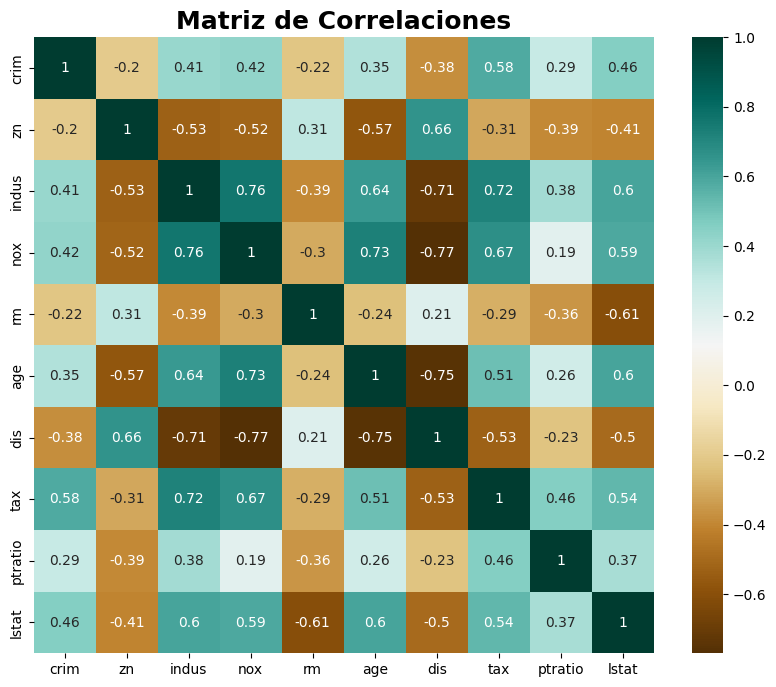

In [14]:
df_corr = pd.read_csv('Boston.csv').drop(columns=['Unnamed: 0', target, 'chas', 'rad'])
plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr().round(2), annot=True, cmap='BrBG')
plt.title('Matriz de Correlaciones', fontsize=18, fontweight='bold')
plt.show()

#### Observaciones

La mayoría de las variables están conrrelacionadas, sin embargo, nos enfocaremos en aquellos pares que un coeficente de correlación mayor 70%:
1. `nox` - `indus`.
2. `age` - `nox`.
3. `dis` - `indus`.
4. `dis` - `nox`.
5. `tax` - `indus`.

# **Feature Engeneering**

En esta sección se crearán nuevas variables y modificarán algunas de las actuales. Además se crearan __ nuevos dataframes que contengan diferentes combinaciones de las nuevas variables con las originales, para probar el desempeño de los modelos utilizando y sin utilizar estas variables

## *Modificación de variables actuales*

Como observamos en las gráficas del análisis exploratorio, podemos modificar algunas de nuestras variables para tratar de controlar los datos atípicos, y tambien corregir las relaciones polinómicas que tienen algunas variables con el target. Entonces se proponen las siguientes modificaciones de variables:

* `rm`: potencia 2.
* `tax`: potencia 2.
* `nox`: potencia 2.
* `ptratio`: potencia 2.
* `indus`: potencia 2.
* `crim`: potencia 2.
* `age`: potencia 2.
* `lstat`: potencia 2.
* `rm`: logaritmo natural.

## *Creación de nuevas variables*

A partir de los datos que se tienen, es posible proponer nuevas variables porque hace sentido relacionarlas unas on otras:

* `crim / indus`: Relación entre criminalidad y zonas industriales.
* `crim / lstat`: Relación entre criminalidad y % de estatus inferior de la población.
* `rm / lstat`: Relación entre promedio de habitaciones y % de estatus inferior de la población.
* `nox / indus`: Relación entre la concentración de óxidos nítricos de habitaciones y zonas industriales.
* `nox / dis`: Relación entre la concentración de óxidos nítricos de habitaciones y las distancias a los centros de empleo.
* `age / lstat`: Relación entre la las casas ocupadas que se construyeron antes de 1940 y el % de status inferior de la población.
* `tax / rm`: Relación entre los impuestos y la cantidad de habitaciones.
* `tax / lstat`: Los impuestos y el % de status inferior de la población.
* `ptratio / rm`: Relación entre la educación y las gabitaciones promedio.
* `ptratio / nox`: Relación entre la educación y la concentración de óxidos nítricos.
* `ptratio / dis`: Relación entre la educación y la distancia a los centros de empleo.

Además, se crearán nuevas variables que relacionen aquellos pares con correlación superior al 70% y que no se repitan con las que ya se definieron utilizando el sentido común:
* `nox / age`.
* `dis / indus`.
* `tax / indus`.

## *Creación de los nuevos DataFrames*

In [15]:
# Variables modificadas
modified_features_df = pd.DataFrame()
modified_features_df['rm_2'] = df['rm']**2
modified_features_df['tax_2'] = df['tax']**2
modified_features_df['nox_2'] = df['nox']**2
modified_features_df['ptratio_2'] = df['ptratio']**2
modified_features_df['indus_2'] = df['indus']**2
modified_features_df['crim_2'] = df['crim']**2
modified_features_df['age_2'] = df['age']**2
modified_features_df['lstat_2'] = df['lstat']**2
modified_features_df['ln_dist'] = np.log(1+df['dis']) # +1 para evitar ln(0)

# Nuevas variables
new_features_df = pd.DataFrame()
new_features_df['crim_indus'] = df['crim'] / (1+df['indus']) # +1 para evitar divisiones entre cero
new_features_df['crim_lstat'] = df['crim'] / (1+df['lstat'])
new_features_df['rm_lstat'] = df['rm'] / (1+df['lstat'])
new_features_df['nox_indus'] = df['nox'] / (1+df['indus'])
new_features_df['nox_dis'] = df['nox'] / (1+df['dis'])
new_features_df['age_lstat'] = df['age'] / (1+df['lstat'])
new_features_df['tax_rm'] = df['tax'] / (1+df['rm'])
new_features_df['tax_lstat'] = df['tax'] / (1+df['lstat'])
new_features_df['ptratio_rm'] = df['ptratio'] / (1+df['rm'])
new_features_df['ptratio_nox'] = df['ptratio'] / (1+df['nox'])
new_features_df['ptratio_dis'] = df['ptratio'] / (1+df['dis'])
new_features_df['nox_age'] = df['nox'] / (1+df['age'])
new_features_df['dis_indus'] = df['dis'] / (1+df['indus'])
new_features_df['tax_indus'] = df['tax'] / (1+df['indus'])

# Nuevos dataframes para futuras pruebas
df_mod_plus_originals = pd.concat([df, modified_features_df], axis=1)
df_new_feat_plus_originals = pd.concat([df, new_features_df], axis=1)
df_all_new_plus_originals = pd.concat([df, modified_features_df, new_features_df], axis=1)
df_all_new_not_originals = pd.concat([df[['medv']], modified_features_df, new_features_df], axis=1)

## *Feature Selection*

Ahora, analizaremos principalmente lo significativas que son nuestras variables para el modelo, y tomar decisiones de descartarlas o dejarlas. Para ello, se usarán las pruebas de hipótesis de `statsmodel`.

### Significancia de las variables originales

En primera instancia revisaremos cuales de las variables originales son realmente significativas al momento de predecir el target. 

Para el proceso de seleccionar las variables, se eliminaran de una por una, para verificar los P-Value cada que eliminemos a la que tenga menor significancia. El orden en el que están acomodadas las variables al momento de definir las variables independientes, es como se fueron descartando, para al final quedar con un modelo con puras variables significativas.

In [16]:
independent_vars = '+'.join(df.columns.difference([target, 'indus', 'age', 'rad_1', 'rad_6','rad_2']))

# Guardar las variables para usarlas en el futura al momento de probar modelos
sign_original_variables = df.columns.difference([target, 'indus', 'age', 'rad_1', 'rad_6','rad_2'])

regresion = f"{target} ~ {independent_vars}"

# Ajustar el modelo de regresión lineal
result = smf.ols(formula=regresion, data=df).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.7323,5.082,8.212,0.000,31.747,51.718
rad_24[T.True],6.0159,1.434,4.195,0.000,3.198,8.834
rad_3[T.True],3.6712,0.988,3.716,0.000,1.730,5.613
rad_4[T.True],1.6252,0.758,2.143,0.033,0.135,3.115
rad_5[T.True],1.8333,0.768,2.386,0.017,0.324,3.343
rad_7[T.True],3.9458,1.317,2.995,0.003,1.358,6.534
rad_8[T.True],3.7931,1.173,3.233,0.001,1.488,6.098
chas,2.6619,0.863,3.085,0.002,0.967,4.357
crim,-0.1233,0.033,-3.769,0.000,-0.188,-0.059
dis,-1.6216,0.189,-8.561,0.000,-1.994,-1.249


### Significancia de las variables creadas en Feature Engeneering

Ahora probaremos la significancia de las nuevas variables por si solas contra el target. Sin incluir en la regresión a las variables originales. El proceso de selección de variables, es el mismo que en el análisis anterior.

In [17]:
independent_vars = '+'.join(df_all_new_not_originals.columns.difference([target, 'nox_dis', 'ptratio_nox',
                                                                         'rm_lstat', 'indus_2', 'crim_2',
                                                                         'ptratio_dis', 'lstat_2', 'nox_age',
                                                                         'age_lstat', 'tax_rm', 'dis_indus']))

# Guardar las variables para usarlas en el futura al momento de probar modelos
sign_new_variables = df_all_new_not_originals.columns.difference([target, 'nox_dis', 'ptratio_nox',
                                                                         'rm_lstat', 'indus_2', 'crim_2',
                                                                         'ptratio_dis', 'lstat_2', 'nox_age',
                                                                         'age_lstat', 'tax_rm', 'dis_indus'])

regresion = f"{target} ~ {independent_vars}"

# Ajustar el modelo de regresión lineal
result = smf.ols(formula=regresion, data=df_all_new_not_originals).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-14.5991,5.304,-2.752,0.006,-25.021,-4.177
age_2,-0.0003,8.23e-05,-3.159,0.002,-0.000,-9.83e-05
crim_indus,-6.6512,1.226,-5.427,0.000,-9.059,-4.243
crim_lstat,4.2601,1.215,3.507,0.000,1.873,6.647
ln_dist,-4.6158,0.840,-5.493,0.000,-6.267,-2.965
nox_2,-13.9655,2.224,-6.279,0.000,-18.335,-9.596
nox_indus,113.3322,13.017,8.706,0.000,87.756,138.908
ptratio_2,-0.0838,0.008,-10.858,0.000,-0.099,-0.069
ptratio_rm,16.8481,1.939,8.688,0.000,13.038,20.658
rm_2,0.7391,0.060,12.282,0.000,0.621,0.857


### Significancia de todas las variables

Ahora que se encontraron todas las variables que son significativas, se realizará una nueva prueba utilizando todas las variables que se encontraron como significativas y ver si hay que hacer nuevas eliminaciones. Nuevamente se sigue la misma metodología de eliminación de variables

In [18]:
all_sign_variables = sign_new_variables.tolist() + sign_original_variables.tolist()

independent_vars = '+'.join(df_all_new_plus_originals[all_sign_variables].columns.difference([target, 'tax', 'nox_2', 
                                                                                              'zn', 'ptratio_2', 'rm_2',
                                                                                              'crim', 'lstat', 'dis', 'rad_5',
                                                                                              'rad_4', 'rad_7', 'rad_8']))

all_sign_variables = df_all_new_plus_originals[all_sign_variables].columns.difference([target, 'tax', 'nox_2', 
                                                                                              'zn', 'ptratio_2', 'rm_2',
                                                                                              'crim', 'lstat', 'dis', 'rad_5',
                                                                                              'rad_4', 'rad_7', 'rad_8'])

formula = f"{target} ~ {independent_vars}"

# Ajustar el modelo de regresión lineal
result = smf.ols(formula=formula, data=df_all_new_plus_originals).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-31.1376,7.658,-4.066,0.000,-46.183,-16.092
rad_24[T.True],2.7641,1.202,2.300,0.022,0.402,5.126
rad_3[T.True],1.3878,0.647,2.145,0.032,0.116,2.659
age_2,-0.0003,8.22e-05,-3.141,0.002,-0.000,-9.67e-05
chas,1.6936,0.649,2.610,0.009,0.419,2.968
crim_indus,-6.6925,1.203,-5.565,0.000,-9.055,-4.330
crim_lstat,3.9880,1.191,3.348,0.001,1.648,6.328
ln_dist,-5.3070,0.852,-6.226,0.000,-6.982,-3.632
nox,-19.2100,2.984,-6.437,0.000,-25.074,-13.346
nox_indus,93.7720,14.172,6.617,0.000,65.927,121.617


# **Prueba de modelos**

## *Regresión lineal múltiple con los datos originales + dummies.*

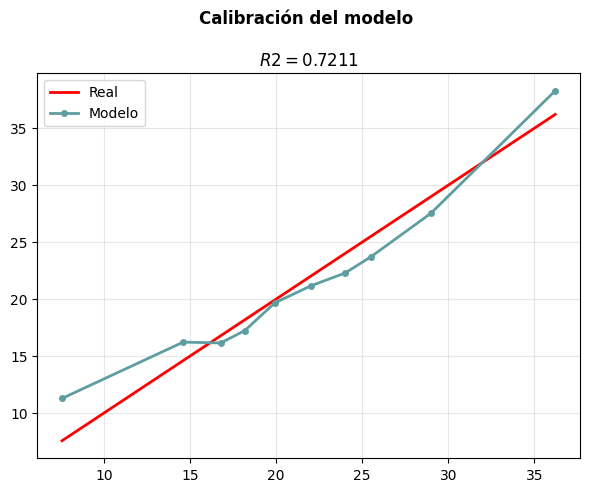

In [19]:
X = df.copy().drop(columns=target)
y = df[target]

lineal(X, y, LinearRegression(), 10)

### Observaciones

Es el modelo mas sencillo de todos, y con el se obtiene un R2 de 0.7211. A pesar de tener muy buen R2 para ser el modelo más sencillo, podemos observar que hay area de mejora en las predicciones pequeñas y grandes en la gráfica de calibración.

## *Regresión polinómica grado 2 con los datos originales + dummies.*

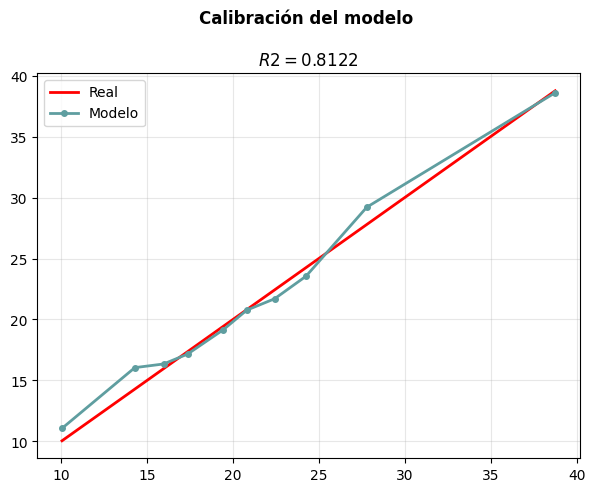

In [20]:
X = df.copy().drop(columns=target)
y = df[target]

polynomial(X, y, Ridge(), 2, 10)

### Observaciones

Hay una gran mejora en la calibración de los datos pequeños, sigue habiendo algo de desajueste en los datos pequeños.

## *Regresión polinómica grado 3 con los datos originales + dummies.*

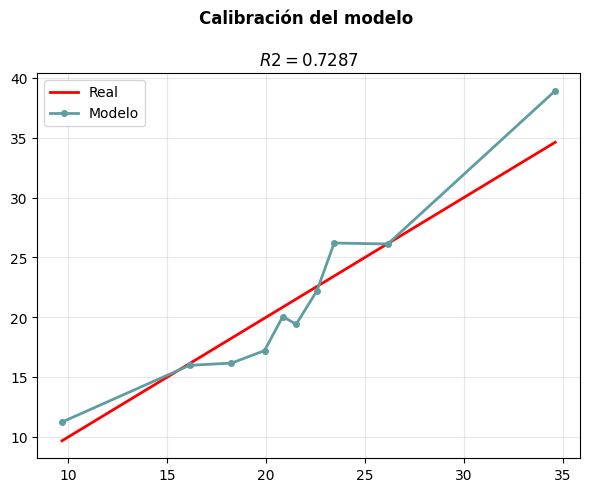

In [21]:
X = df.copy().drop(columns=target)
y = df[target]

polynomial(X, y, Lasso(), 3, 10)

### Observaciones

El modelo comienza a memorizar, por lo que, se dejarán de probar modelos de polinomios grado 3.

## *Regresión lineal múltiple con las variables originales que son significativas.*

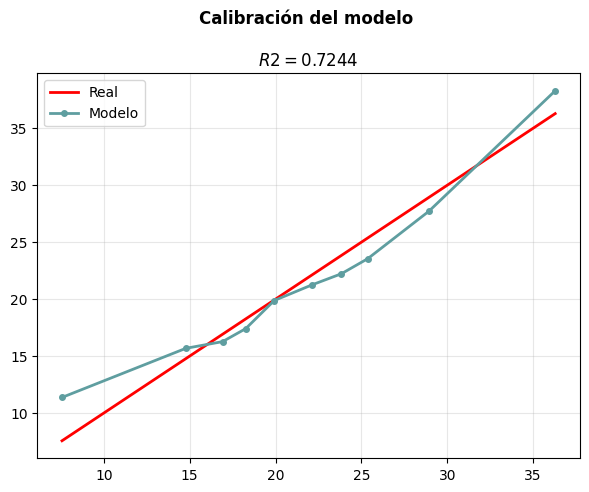

In [22]:
X = df[sign_original_variables].copy()
y = df[target]

lineal(X, y, LinearRegression(), 10)

### Observaciones

El R2 mejora un poco en comparación al modelo en el que no se eliminaron las variables insignificantes, sin embargo, no es el mejor modelo.

## *Regresión polinomial grado 2 con las variables originales que son significativas.*

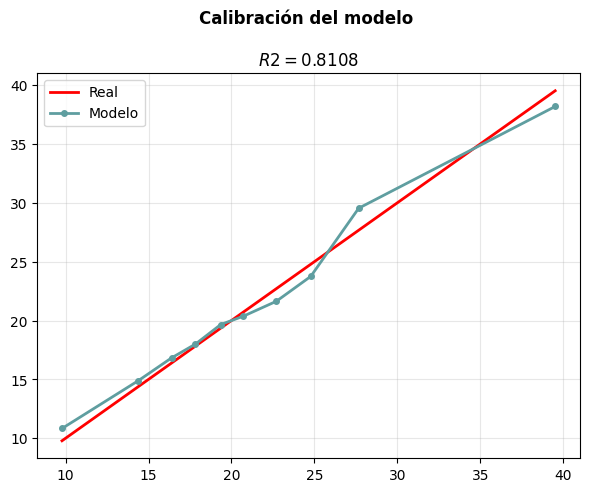

In [23]:
X = df[sign_original_variables].copy()
y = df[target]

polynomial(X, y, Ridge(), 2, 10)

### Observaciones

El R2 es mas bajo que el polinomio con las variables insigificantes, por lo que, vemos que quitarlas no necesariamente mejora el R2.

## *Regresión lineal múltiple con todas las variables significativas creadas, sin las originales.*

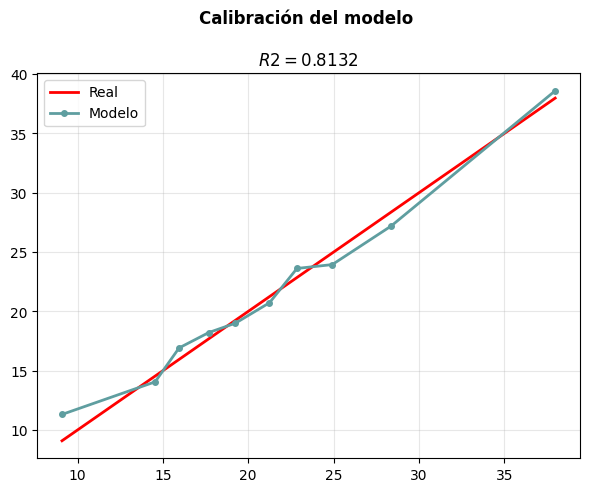

In [24]:
X = df_all_new_not_originals[sign_new_variables.tolist()]
y = df[target]

lineal(X, y, LinearRegression(), 10)

### Observaciones

Las variables creadas en el Feature Engeneering son mejores predictoras que las originales, dado que el R2 aumento casi 10% en comparación a la regresión lineal con las variables originales.

## *Regresión lineal polinomial grado 2 con todas las variables significativas creadas, sin las originales.*

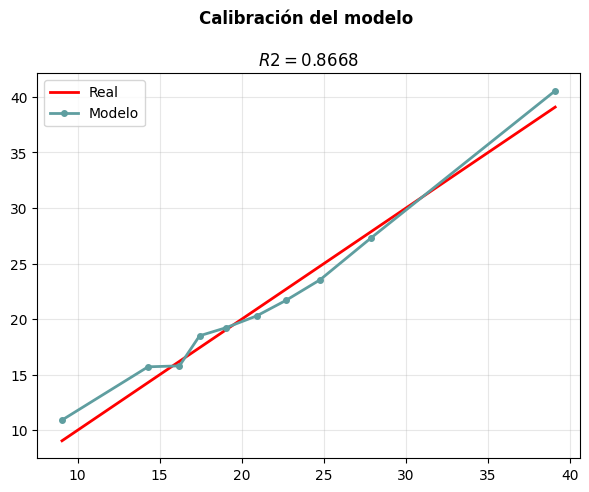

In [25]:
X = df_all_new_not_originals[sign_new_variables.tolist()]
y = df[target]

polynomial(X, y, Ridge(), 2, 10)

### Observaciones

La mejor calibración hasta ahora. Tenemos mejor ajuste en todo el modelo, pero sigue habiendo desajuste al principio.

## *Regresión lineal múltiple con todas las variables significativas, originales y creadas.*

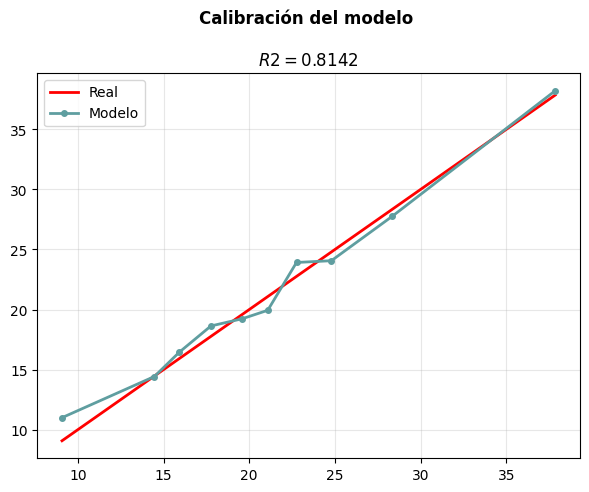

In [26]:
X = df_all_new_plus_originals[all_sign_variables.tolist()]
y = df[target]

lineal(X, y, LinearRegression(), 10)

### Observaciones

Observamos que mantener las variables originales y las creadas no ayuda en prácticamente en nada. Por lo que sería mejor quedarnos con un modelo mas sencillo y con el mismo ajuste, como lo fue el modelo con las variables creadas que fueron significativas.

## *Regresión lineal polinomica grado 2 con todas las variables significativas, originales y creadas.*

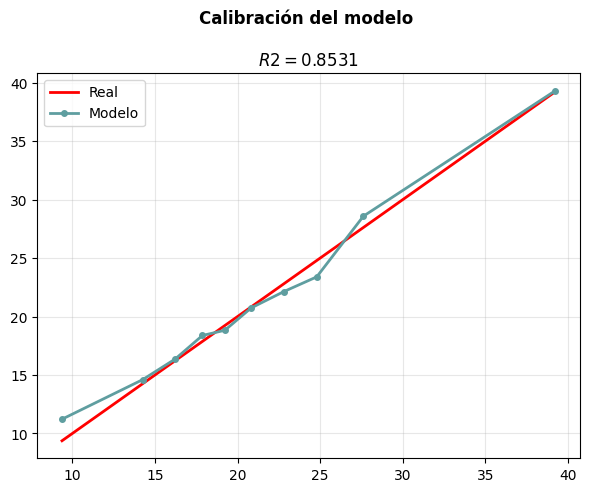

In [27]:
X = df_all_new_plus_originals[all_sign_variables.tolist()]
y = df[target]

polynomial(X, y, Ridge(), 2, 10)

### Observaciones

Nuevamente, mantener todas las variables, creadas y originales, empeoró el ajuste del modelo.

## *Regresión lineal múltiple con todas las variables creadas y originales, sin eliminar las no significativas.*

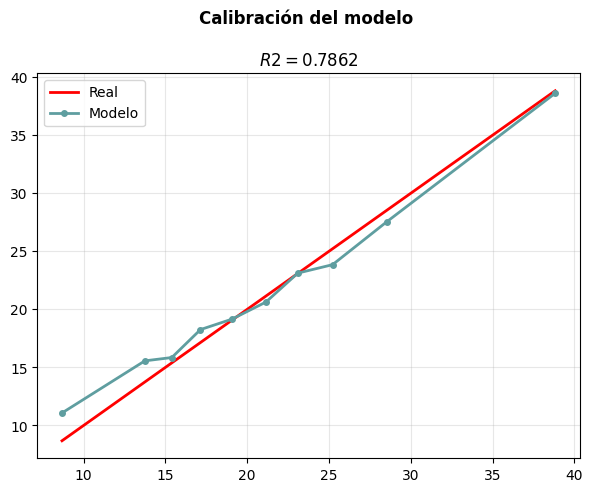

In [28]:
X = df_all_new_plus_originals.copy().drop(columns={target})
y = df[target]

lineal(X, y, LinearRegression(), 10)

### Observaciones

Observamos como se ve perjudicado habiendo dejado las variables no significativas a comparación de modelos anteriores, lo que significa que puede estar comenzando a memorizar.

## *Regresión lineal múltiple con todas las variables creadas, sin incluir las originales y sin eliminar las no significativas.*

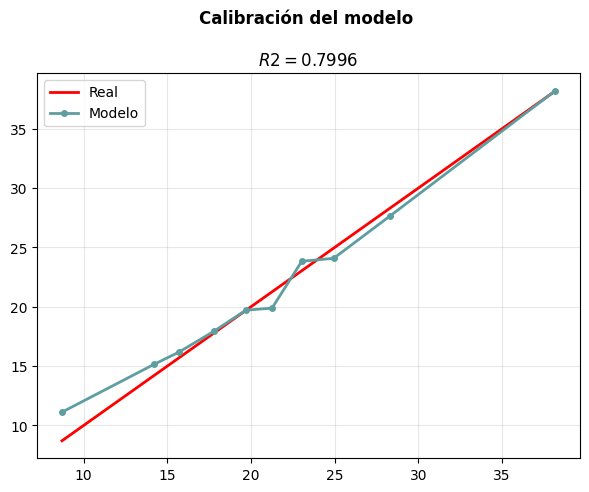

In [29]:
X = df_all_new_not_originals.copy().drop(columns={target})
y = df[target]

lineal(X, y, LinearRegression(), 10)

### Observaciones

Podemos observar que dejar las variables insignificantes empeoran un poco el R2, sin embargo se hará una prueba con un polinomio de grado 2.

## *Regresión polinómica grado 2 con todas las variables creadas, sin incluir las originales y sin eliminar las no significativas.*

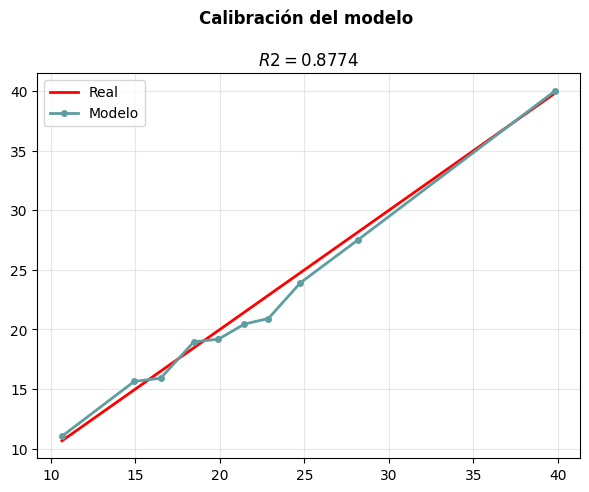

In [30]:
X = df_all_new_not_originals.copy().drop(columns={target})
y = df[target]

polynomial(X, y, Ridge(), 2, 10)

### Observaciones

El mejor modelo hasta ahora. Logra casi un R2 de 0.88 con un muy buen ajuste en las predicciones pequeñas. Sin embargo, empeora un poco su precision en las predicciones grandes.

## *Regresión lineal múltiple con las variables predictoras del mejor modelo controlando outliers con logaritmos naturales.*

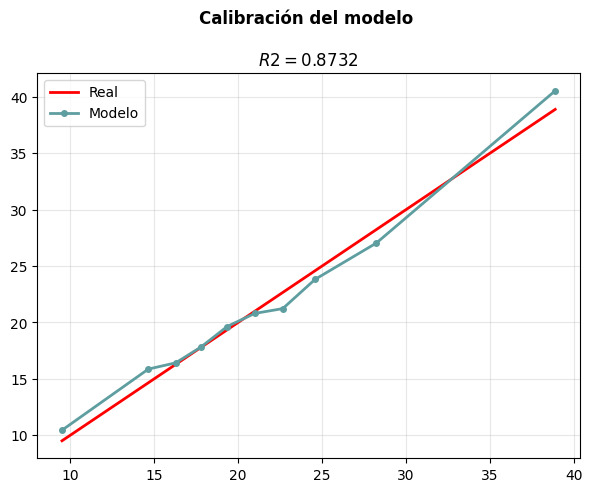

In [31]:
X = np.log(1 + df_all_new_not_originals).copy().drop(columns={target})
y = df[target]

polynomial(X, y, Ridge(), 2, 10)

### Observaciones

El modelo no empeora prácticamente nada, pero tampoco mejora con respecto al modelo anterior, que es el mejor hasta ahora.

## *KNN utilizando la mismas variables $x$ que el mejor modelo hasta ahora*

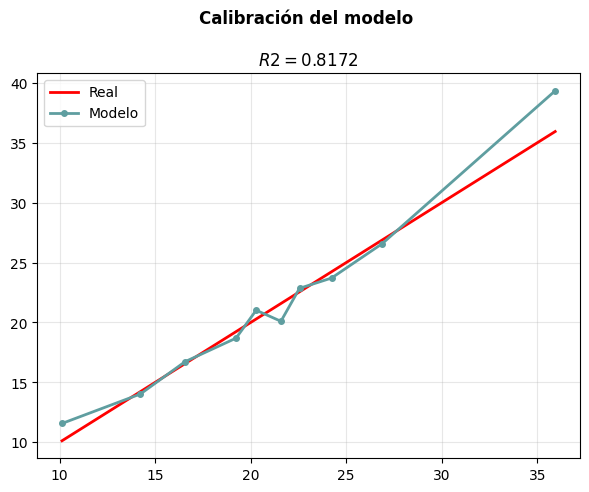

In [32]:
X = df_all_new_not_originals.copy().drop(columns={target})
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn = []
r2 = []
r2_train = []
for i in range(1, 100):
    model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_true=y_test, y_pred=predicciones))
    nn.append(i)
    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_true=y_train, y_pred=predicciones_train))
    
resultados = pd.DataFrame({'nn':nn, 'r2': r2, 'r2_train': r2_train})

maxr2 = resultados[resultados['r2'] == resultados.max()['r2']][['nn', 'r2']]
model = KNeighborsRegressor(n_neighbors=int(maxr2['nn'])).fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)
calibracion(predicciones, y_test, 10)

### Observaciones

Para que el KNN sea un modelo tan sencillo, obtuvo buenos resultados utilizando las variables creadas, sin embargo no es el mejor.

## *Ultima propuesta de modelo*

Antes de escoger al mejor modelo, se realizará una última prueba, en donde se tomaran las variables predictoras del mejor modelo hasta ahora y se intentará crear variables categóricas a partir de las numéricas creando bins.

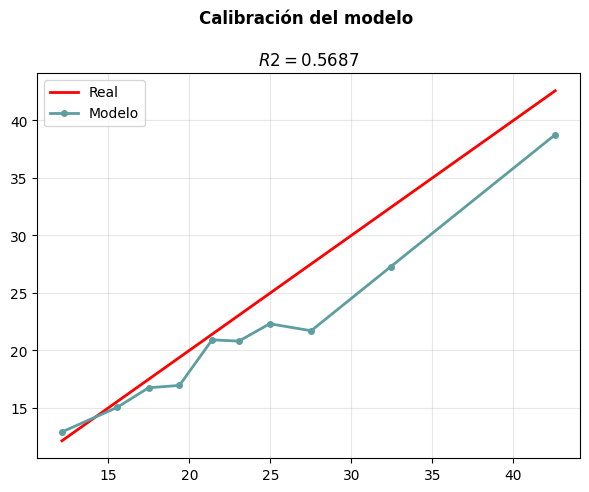

In [33]:
X = df_all_new_not_originals.copy().drop(columns={target})
y = df[target]

numerical_features = df_all_new_not_originals[sign_new_variables.tolist()].columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

def create_bins(X, numeric_vars, bins):
    for var in numeric_vars:
        X[f'{var}_bin']=pd.qcut(X[var], q=bins, labels=False, duplicates='drop')
    return X

X_train = create_bins(X_train, numerical_features, 8)
X_test = create_bins(X_test, numerical_features, 8)


bin_features = [i for i in X_train.keys() if 'bin' in i]

X_train = pd.get_dummies(X_train[bin_features], columns=bin_features)
X_test = pd.get_dummies(X_test[bin_features], columns=bin_features)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

model = LinearRegression().fit(X_train, y_train)
predicciones_lineal = model.predict(X_test)
calibracion(predicciones_lineal, y_test, 10)

### Observaciones

La suposición es que comenzó a memorizar, por lo que, tuvo el peor ajuste de todos los modelos.

# **Mejor Modelo**

El modelo con mejor R2 fue en el que se utilizaron únicamente las variables que se crearon en Feature Engeneering y no se utiliza ninguna de las originales. Además, se mantienen las variables que fueron insignificativas para el modelo, dado que quitarlas empeora el R2. Este modelo consiste en una regresión polinómica de grado 2.

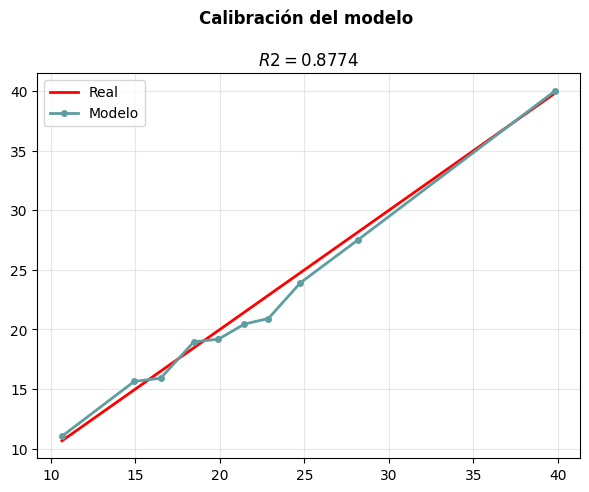

In [34]:
X = df_all_new_not_originals.copy().drop(columns={target})
y = df[target]

polynomial(X, y, Ridge(), 2, 10)

# **Conclusiones**

+ El proceso de modelado en este trabajo tuvo como objetivo maximizar el coeficiente 𝑅2, optimizando la capacidad predictiva del modelo. A lo largo del análisis, se exploraron distintas regresiones lineales y polinómicas,evaluando tanto las variables originales del dataset, como aquellas creadas en el Feature Engineering.

+ Lo que a mi personalemente me llamó más la atención es que las variables que fueron más útiles a la hora de subir el R2 fueron aquellas creadas manualmente y no las del dataset original, logrando incrementar el 𝑅2 en aproximadamente un 10% en regresiones lineales y más del 10% en las polinómicas. 

+ Se observó que la eliminación de variables insignificantes no siempre mejoraba el desempeño del modelo, lo que sugiere que ciertas relaciones entre las variables podrían ser más complejas de lo esperado.

+ El mejor modelo identificado fue una regresión polinómica de grado 2 utilizando únicamente las variables generadas en Feature Engineering, sin incluir las originales. Esta combinación permitió captar relaciones en los datos y mejorar el ajuste del modelo. 

+ Se detectó que al incrementar aún más la complejidad del modelo, este comenzaba a memorizar los datos, resultando en un sobreajuste, por lo que hubo que encontrar un equilibrio en la complejidad..

+ Hay que destacar la importancia de un proceso iterativo y de prueba y error, en el que poco a poco se logra identificar qué modelos funcionan mejor para los datos, y qué variables son las que más nos ayudan a mejorar el poder predictivo del modelo.

+ El análisis de la matriz de correlación fue de gran ayuda para identificar correlacionadas para crear nuevas a partir de ellas. Tambien, en los box-plots se observaron variables con outliers, y que a pesar de tratar de controlarlos, el modelo no presentó mejoras. 

+ El análisis bivariado fue de grán ayuda para identificar relaciones de las variables con la objetivo que no eran precisamente lineales, sino que podrían ajustarse mejor polinomios o logaritmos. Y gracias a esto, se crearon nuevas variables en el Feature Engeneering que tuvieron un mayor impacto que las originales, y con ellas pudiendo crear el mejor modelo.